# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [2]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [3]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

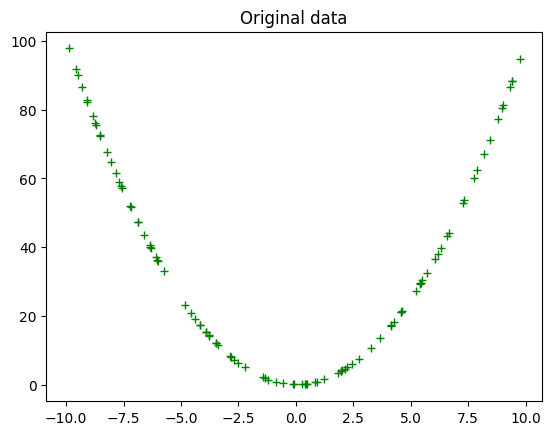

In [4]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [5]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


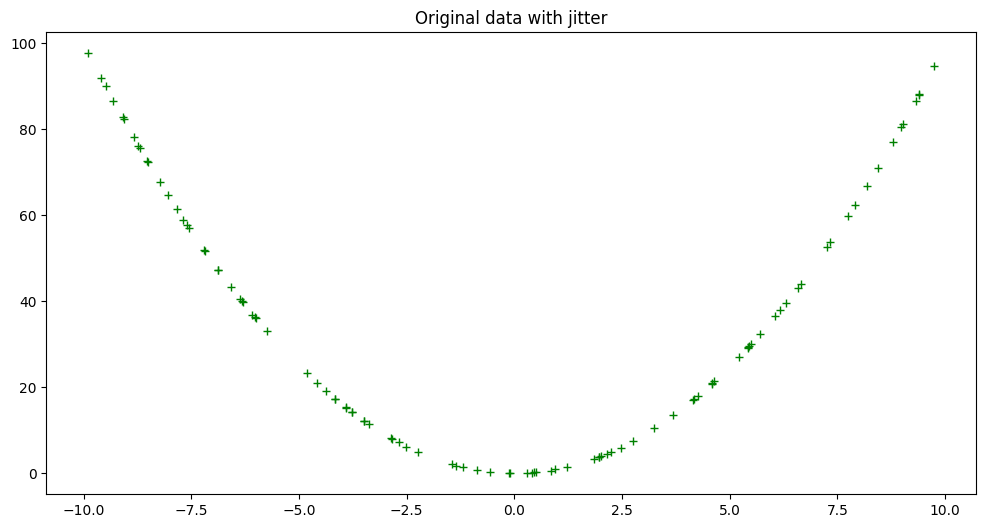

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [7]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

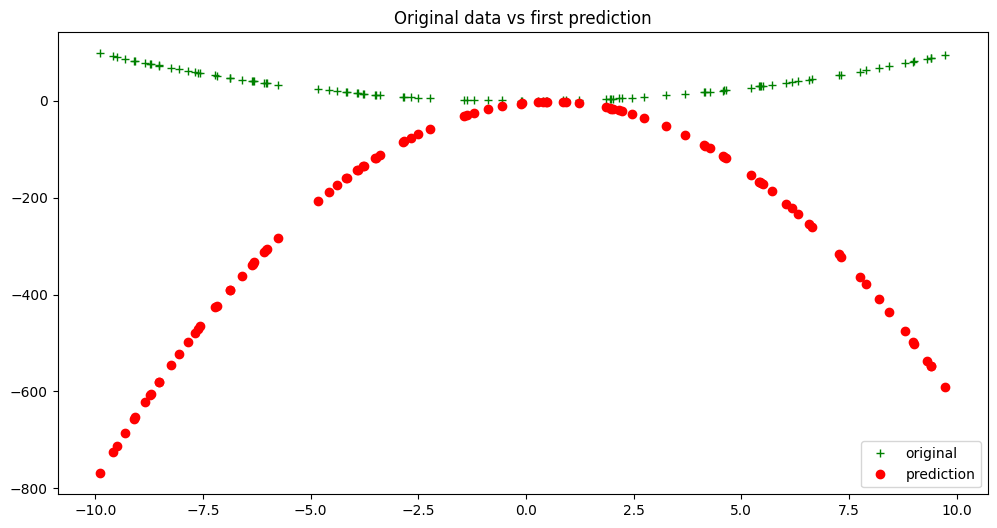

In [8]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [9]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

np.float64(146807.86204726336)

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [10]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [11]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (np.float64(-3.4872074852403587), np.float64(7.879149056895183), np.float64(-4.941405407033594))
Now have smaller model loss: 49608.172144854274 vs 146807.86204726336


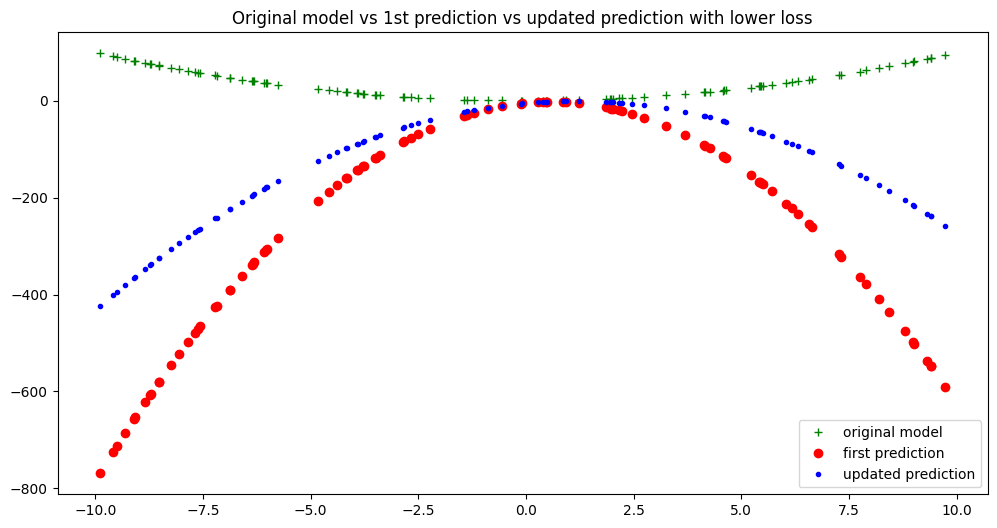

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [13]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [14]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [15]:
GD = gradient_descent(30000, 0.0003)


[np.float64(13475.624637116503), np.float64(2869.715432846906), np.float64(1958.273415665309), np.float64(1815.4133533665963), np.float64(1736.1622571518062), np.float64(1664.7307185029726), np.float64(1596.5981613153112), np.float64(1531.2972754982177), np.float64(1468.6853640008349), np.float64(1408.6497165327594), np.float64(1351.0841647769712), np.float64(1295.8870592843532), np.float64(1242.960945034913), np.float64(1192.2123779132319), np.float64(1143.5517588087196), np.float64(1096.8931753375862), np.float64(1052.154250140267), np.float64(1009.2559954258945), np.float64(968.1226735021916), np.float64(928.6816630441622), np.float64(890.8633308653946), np.float64(854.6009089655777), np.float64(819.8303766371265), np.float64(786.4903474227408), np.float64(754.5219607243141), np.float64(723.8687778717832), np.float64(694.476682468427), np.float64(666.2937848366366), np.float64(639.2703303954412), np.float64(613.3586118080115), np.float64(588.5128847440168), np.float64(564.6892871080

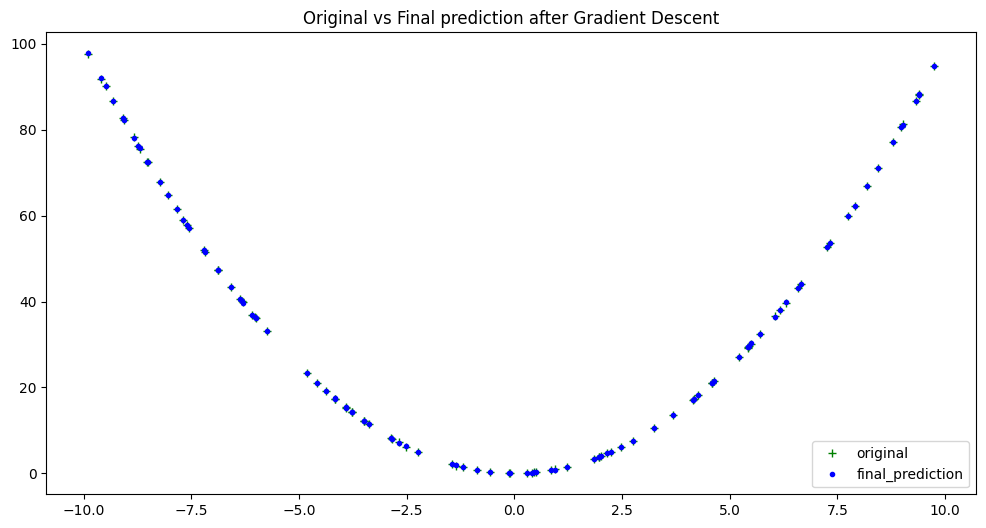

In [16]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [17]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (np.float64(0.9999579417260247), np.float64(-0.002867610798230069), np.float64(-0.012778521556486263))
Original Coefficients: [1, 0, 0]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


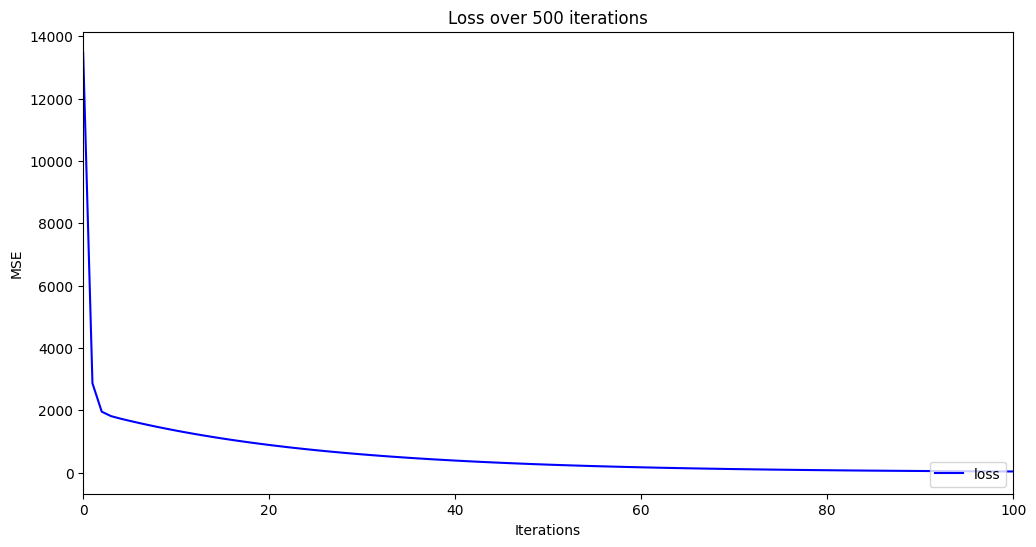

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



## **Additional Critical Thinking Questions**

1. You are doing full batch gradient descent using the entire training set. Is it necessary to shuffle the training data? Explain your
answer.

2. You would like to train a dog/cat image classifier using mini-batch gradient
descent. You have already split your dataset into train, dev and test sets. The classes
are balanced. You realize that within the training set, the images are ordered in such a
way that all the dog images come first and all the cat images come after. A friend tells
you: ”you absolutely need to shuffle your training set before the training procedure.”
Is your friend right? Explain.

Original cubic coefficients: [0.5, -2, 1, 3]
Generated data points: 11


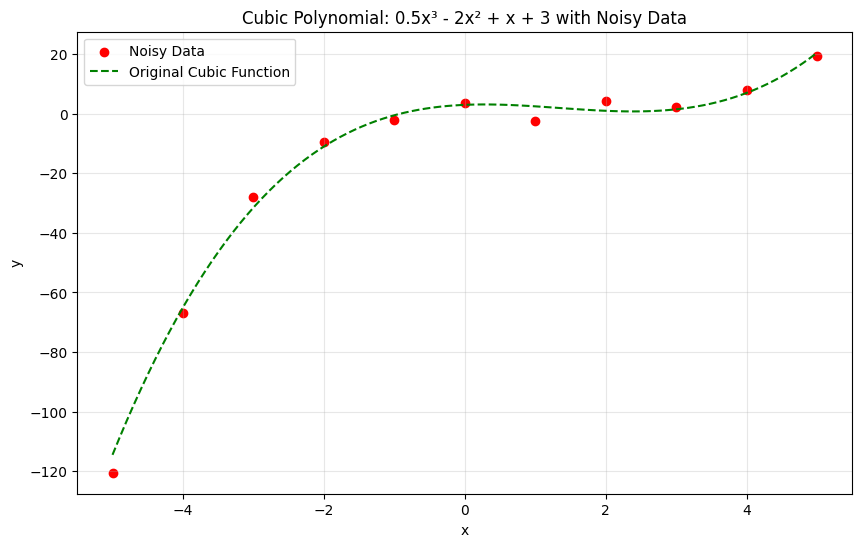

In [19]:
# 1. Change the coefficients array and try a different polynomial instead of our x^2

# Let's try a cubic polynomial: ax^3 + bx^2 + cx + d
def poly_3rd_degree(coeffs, x):
    """
    Function to return the output of evaluating a third degree polynomial.
    
    Args:
        coeffs: List containing the coefficients a, b, c, and d for the polynomial.
        x: The input x value to the polynomial.
    
    Returns:
        y: The corresponding output y value for the third degree polynomial.
    """
    a, b, c, d = coeffs
    return a * x**3 + b * x**2 + c * x + d

def poly_3rd_degree_noisy(coeffs, x):
    """
    Function to return the noisy output of evaluating a third degree polynomial.
    """
    import random
    y = poly_3rd_degree(coeffs, x)
    noise = random.gauss(0, 2)
    return y + noise

# Test with a cubic polynomial: 0.5x^3 - 2x^2 + x + 3
coeffs_cubic = [0.5, -2, 1, 3]

# Generate data
import numpy as np
xs_cubic = list(range(-5, 6))
ys_cubic = [poly_3rd_degree_noisy(coeffs_cubic, x) for x in xs_cubic]

print("Original cubic coefficients:", coeffs_cubic)
print("Generated data points:", len(xs_cubic))

# Plot original cubic function
hundred_xs_cubic = np.linspace(-5, 5, 100)
y_bar_cubic = [poly_3rd_degree(coeffs_cubic, x) for x in hundred_xs_cubic]

plt.figure(figsize=(10, 6))
plt.scatter(xs_cubic, ys_cubic, color='red', label='Noisy Data')
plt.plot(hundred_xs_cubic, y_bar_cubic, 'g--', label='Original Cubic Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Polynomial: 0.5x³ - 2x² + x + 3 with Noisy Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Starting gradient descent for cubic polynomial...
Epoch 0, Loss: 1402.768854
Epoch 1000, Loss: 12.590227
Epoch 2000, Loss: 11.915247
Epoch 3000, Loss: 11.799011
Epoch 4000, Loss: 11.685946

Final coefficients: [np.float64(0.5563727604169381), np.float64(-1.9112835808296431), np.float64(0.18869111431096572), np.float64(0.14349060801851238)]
Original coefficients: [0.5, -2, 1, 3]
Final loss: 11.575637


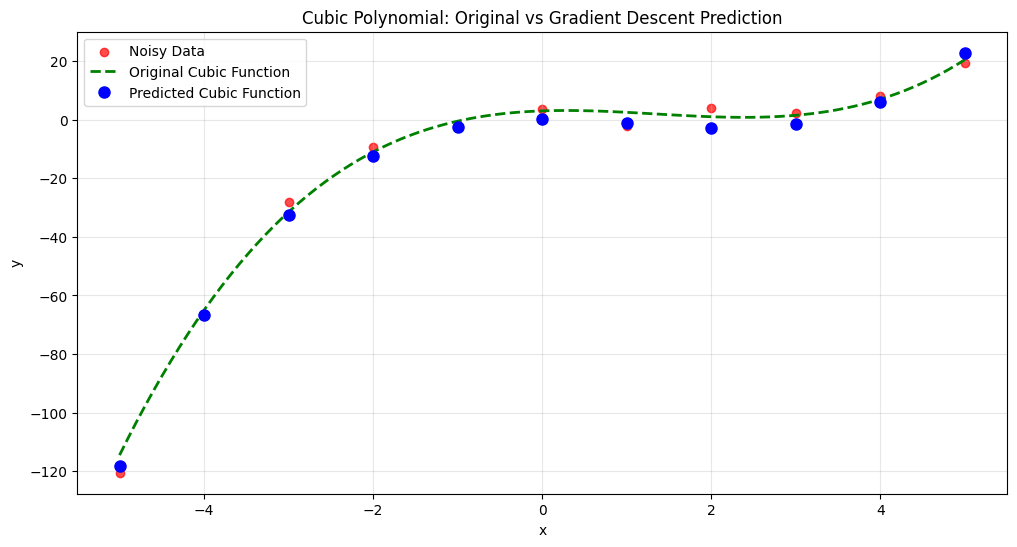

In [20]:
# Implement gradient descent for cubic polynomial
def calc_gradient_3rd_poly(coeffs, inputs_x, outputs_y, lr):
    """
    Calculate gradient for a third degree polynomial: ax^3 + bx^2 + cx + d
    """
    a_s, b_s, c_s, d_s = [], [], [], []
    
    # Convert inputs to numpy array for easier computation
    inputs_x = np.array(inputs_x)
    y_bars = [poly_3rd_degree(coeffs, x) for x in inputs_x]
    
    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        # Partial derivatives for cubic polynomial
        partial_a = (x**3) * (y - y_bar)
        partial_b = (x**2) * (y - y_bar)
        partial_c = x * (y - y_bar)
        partial_d = (y - y_bar)
        
        a_s.append(partial_a)
        b_s.append(partial_b)
        c_s.append(partial_c)
        d_s.append(partial_d)
    
    n = len(outputs_y)
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    
    # Update coefficients
    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[3] - lr * gradient_d
    
    new_coeffs = [a_new, b_new, c_new, d_new]
    new_y_bar = [poly_3rd_degree(new_coeffs, x) for x in inputs_x]
    updated_loss = loss_mse(np.array(outputs_y), np.array(new_y_bar))
    
    return updated_loss, new_coeffs, new_y_bar

def gradient_descent_cubic(epochs, lr, initial_coeffs, xs, ys):
    """
    Perform gradient descent for cubic polynomial
    """
    losses = []
    current_coeffs = initial_coeffs.copy()
    
    for i in range(epochs):
        loss, new_coeffs, new_y_bar = calc_gradient_3rd_poly(current_coeffs, xs, ys, lr)
        current_coeffs = new_coeffs
        losses.append(loss)
        
        if i % 1000 == 0:
            print(f"Epoch {i}, Loss: {loss:.6f}")
    
    return loss, current_coeffs, new_y_bar, losses

# Try gradient descent on cubic polynomial
print("Starting gradient descent for cubic polynomial...")
initial_cubic_coeffs = [0.1, 0.1, 0.1, 0.1]  # Random initialization
GD_cubic = gradient_descent_cubic(5000, 0.00001, initial_cubic_coeffs, xs_cubic, ys_cubic)

print(f"\nFinal coefficients: {GD_cubic[1]}")
print(f"Original coefficients: {coeffs_cubic}")
print(f"Final loss: {GD_cubic[0]:.6f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.scatter(xs_cubic, ys_cubic, color='red', label='Noisy Data', alpha=0.7)
plt.plot(hundred_xs_cubic, y_bar_cubic, 'g--', label='Original Cubic Function', linewidth=2)
plt.plot(xs_cubic, GD_cubic[2], 'bo', label='Predicted Cubic Function', markersize=8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Polynomial: Original vs Gradient Descent Prediction')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Testing different learning rates...

Testing learning rate: 1e-05
[np.float64(134713.89057256628), np.float64(123630.45878546423), np.float64(113473.10878375187), np.float64(104164.44143316484), np.float64(95633.52641419876), np.float64(87815.36157565704), np.float64(80650.37747400091), np.float64(74083.98332199229), np.float64(68066.15088574983), np.float64(62551.03315859018), np.float64(57496.61490510184), np.float64(52864.39241182355), np.float64(48619.08000351412), np.float64(44728.34108801779), np.float64(41162.541679689486), np.float64(37894.52452268083), np.float64(34899.4020924058), np.float64(32154.366897396878), np.float64(29638.517635631204), np.float64(27332.699880251846), np.float64(25219.36008035556), np.float64(23282.411764009394), np.float64(21507.112923665605), np.float64(19879.95364937975), np.float64(18388.55315334771), np.float64(17021.56540085999), np.float64(15768.59262837147), np.float64(14620.106089502622), np.float64(13567.373424880521), np.float64(12602.392102

C:\Users\IC1807\AppData\Local\Temp\ipykernel_27848\1511627215.py:12: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
C:\Users\IC1807\AppData\Local\Temp\ipykernel_27848\1511627215.py:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
C:\Users\IC1807\AppData\Local\Temp\ipykernel_27848\351704582.py:32: RuntimeWarning: overflow encountered in scalar add
  gradient_a = (-2 / n) * sum(a_s)
C:\Users\IC1807\AppData\Local\Temp\ipykernel_27848\351704582.py:33: RuntimeWarning: invalid value encountered in scalar add
  gradient_b = (-2 / n) * sum(b_s)
C:\Users\IC1807\AppData\Local\Temp\ipykernel_27848\351704582.py:37: RuntimeWarning: invalid value encountered in scalar subtract
  a_new = coeffs[0] - lr * gradient_a
c:\IIIT\iHub_AIML_2025\.venv\Lib\site-packages\matplotlib\scale.py:270: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)
C:\Users\IC1807\AppData

Final loss: nan
Final coefficients: (np.float64(nan), np.float64(nan), np.float64(nan))
Converged: No

Testing learning rate: 0.1
[np.float64(26254374695.423546), np.float64(4764601130304656.0), np.float64(8.646745131624383e+20), np.float64(1.5692016890360262e+26), np.float64(2.847769771619479e+31), np.float64(5.1681009068576605e+36), np.float64(9.379012042913093e+41), np.float64(1.7020926736237892e+47), np.float64(3.0889388523526674e+52), np.float64(5.605771872138821e+57), np.float64(1.0173292442655008e+63), np.float64(1.8462377971205902e+68), np.float64(3.350531819202398e+73), np.float64(6.080507878777054e+78), np.float64(1.1034838067191127e+84), np.float64(2.002590138796452e+89), np.float64(3.634278309827171e+94), np.float64(6.595447853956866e+99), np.float64(1.1969345406662823e+105), np.float64(2.1721834913462347e+110), np.float64(3.942054439711133e+115), np.float64(7.153996551191573e+120), np.float64(1.2982993369876251e+126), np.float64(2.356139196267513e+131), np.float64(4.275895

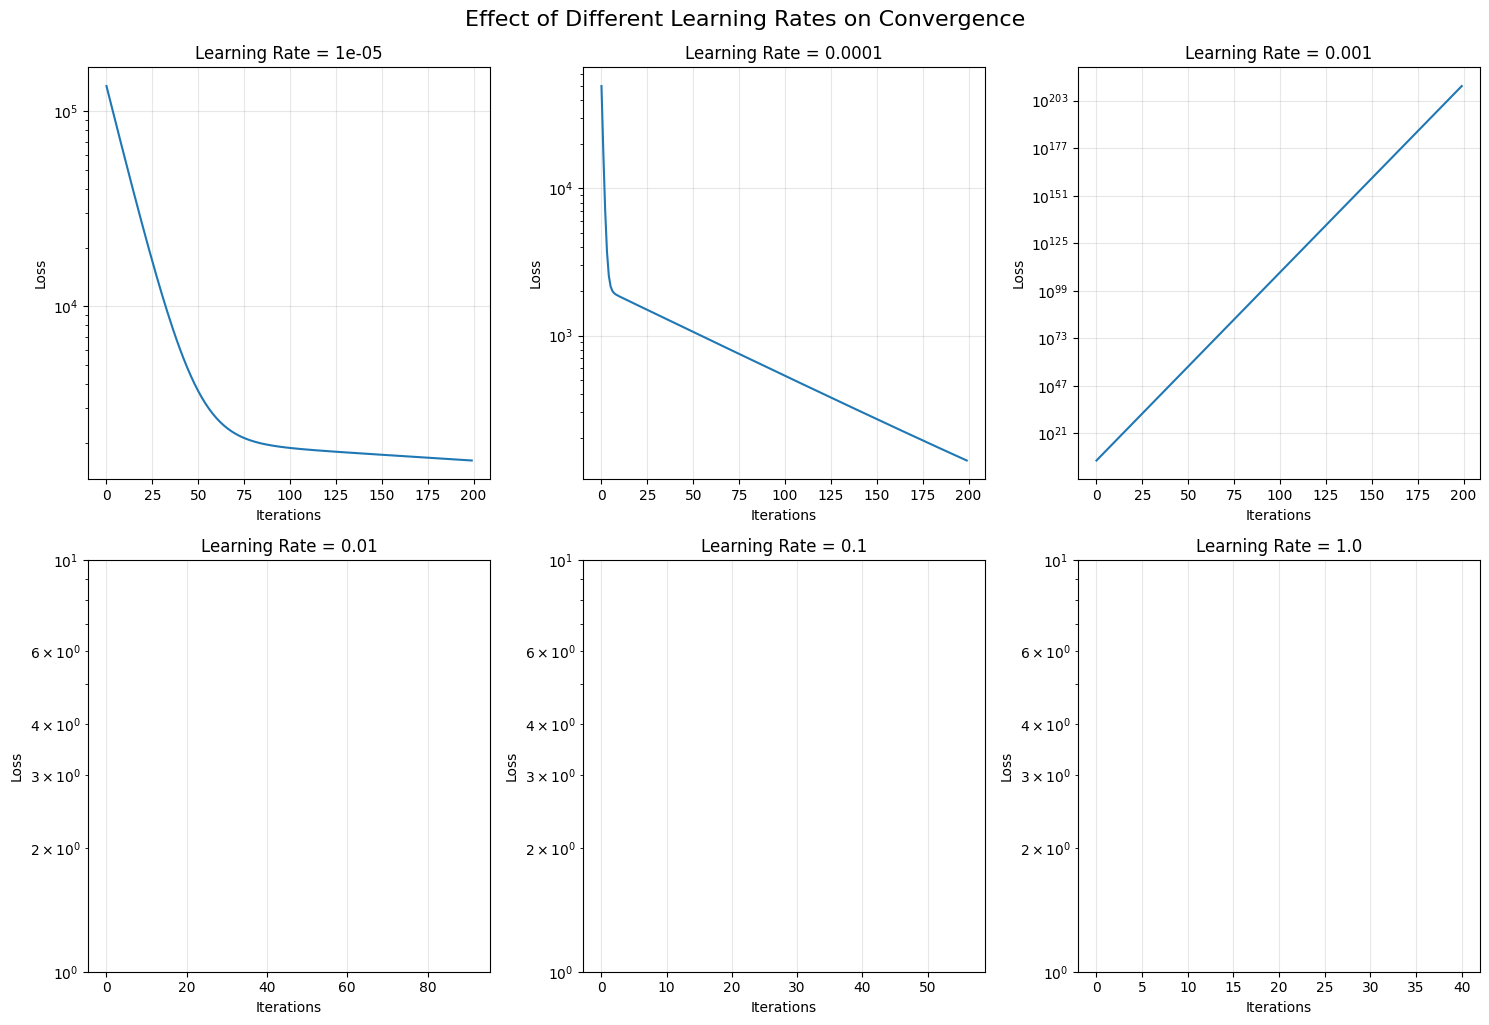


Testing EXTREMELY HIGH learning rate (10.0):
[np.float64(263765696225746.6), np.float64(4.809046068910716e+23), np.float64(8.768014105713177e+32), np.float64(1.5986137444803467e+42), np.float64(2.914646205207365e+51), np.float64(5.314080734549909e+60), np.float64(9.688810258638355e+69), np.float64(1.7664963879372965e+79), np.float64(3.220735472462509e+88), np.float64(5.872152954521919e+97), np.float64(1.0706306250893706e+107), np.float64(1.9520096704847815e+116), np.float64(3.558969512335819e+125), np.float64(6.488832602243295e+134), np.float64(1.18306572714362e+144), np.float64(2.1570051202399402e+153), np.float64(3.932724093000873e+162), np.float64(7.170274491489889e+171), np.float64(1.3073084983208162e+181), np.float64(2.383528708434016e+190), np.float64(4.3457294978395725e+199), np.float64(7.923279800057763e+208), np.float64(1.444598952171619e+218), np.float64(2.633841269369441e+227), np.float64(4.802107755792897e+236), np.float64(8.755363949387534e+245), np.float64(1.596307325543

C:\Users\IC1807\AppData\Local\Temp\ipykernel_27848\3605940461.py:15: RuntimeWarning: overflow encountered in multiply
  a = coeffs[0] * (x * x)


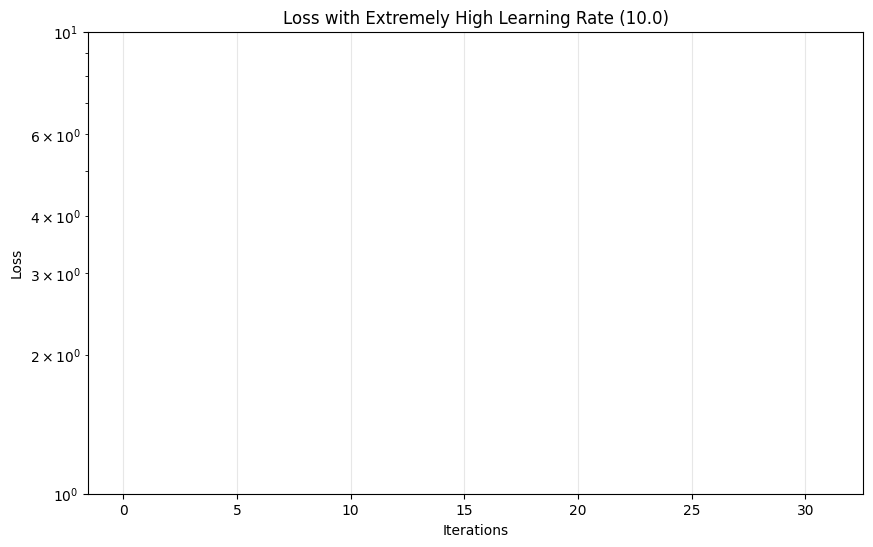


Conclusion:
- Low learning rates (0.00001-0.001): Slow but stable convergence
- Medium learning rates (0.01-0.1): Faster convergence
- High learning rates (1.0+): May cause oscillations or divergence
- Extremely high rates: Usually cause the algorithm to diverge


In [21]:
# 2. Increase/decrease the learning rate to see how many iterations will be take to converge. 
#    Does it even converge on a huge learning rate?

print("Testing different learning rates...")

# Test different learning rates
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]
epochs = 1000

plt.figure(figsize=(15, 10))

for i, lr in enumerate(learning_rates):
    print(f"\nTesting learning rate: {lr}")
    
    # Use the same initial coefficients for fair comparison
    initial_coeffs = [-5, 3, -2]  # Start far from true values [1, 0, 0]
    
    try:
        # Run gradient descent
        GD_lr_test = gradient_descent(epochs, lr)
        losses = GD_lr_test[3]
        
        # Plot loss curves
        plt.subplot(2, 3, i+1)
        plt.plot(losses[:min(200, len(losses))], label=f'LR={lr}')
        plt.title(f'Learning Rate = {lr}')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.yscale('log')
        plt.grid(True, alpha=0.3)
        
        final_loss = losses[-1] if losses else float('inf')
        final_coeffs = GD_lr_test[1]
        
        print(f"Final loss: {final_loss:.6f}")
        print(f"Final coefficients: {final_coeffs}")
        print(f"Converged: {'Yes' if final_loss < 1.0 else 'No'}")
        
        # Check for divergence
        if final_loss > 1e10:
            print("DIVERGED! Loss exploded.")
            plt.text(0.5, 0.5, 'DIVERGED', transform=plt.gca().transAxes, 
                    fontsize=12, color='red', ha='center', va='center')
        
    except Exception as e:
        print(f"Error with learning rate {lr}: {e}")
        plt.subplot(2, 3, i+1)
        plt.text(0.5, 0.5, 'ERROR', transform=plt.gca().transAxes, 
                fontsize=12, color='red', ha='center', va='center')
        plt.title(f'Learning Rate = {lr} (ERROR)')

plt.tight_layout()
plt.suptitle('Effect of Different Learning Rates on Convergence', y=1.02, fontsize=16)
plt.show()

# Test an extremely high learning rate
print("\n" + "="*50)
print("Testing EXTREMELY HIGH learning rate (10.0):")
try:
    GD_extreme = gradient_descent(100, 10.0)  # Very high learning rate
    print(f"Final loss with LR=10.0: {GD_extreme[0]}")
    print(f"Final coefficients: {GD_extreme[1]}")
    
    # Plot the loss curve for extreme learning rate
    plt.figure(figsize=(10, 6))
    plt.plot(GD_extreme[3][:50], 'r-', linewidth=2)
    plt.title('Loss with Extremely High Learning Rate (10.0)')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    plt.show()
    
except Exception as e:
    print(f"Gradient descent failed with extreme learning rate: {e}")

print("\nConclusion:")
print("- Low learning rates (0.00001-0.001): Slow but stable convergence")
print("- Medium learning rates (0.01-0.1): Faster convergence")  
print("- High learning rates (1.0+): May cause oscillations or divergence")
print("- Extremely high rates: Usually cause the algorithm to diverge")

Testing Degree 5 Polynomial with Different Initializations
True coefficients: [1, 0, -5, 0, 4, 0]
Generated 20 data points

Testing initialization: Random Small
Initial coeffs: [-0.095, 0.035, -0.016, 0.025, -0.037, -0.055]
Final loss: 96.956852
Final coeffs: [np.float64(0.433), np.float64(0.049), np.float64(0.006), np.float64(0.025), np.float64(-0.044), np.float64(-0.053)]
Converged: Yes

Testing initialization: Random Large
Initial coeffs: [-3.695, -0.91, 1.515, 1.027, -1.999, 0.572]
Final loss: 175.529066
Final coeffs: [np.float64(0.223), np.float64(-0.197), np.float64(1.944), np.float64(1.114), np.float64(-1.956), np.float64(0.584)]
Converged: No

Testing initialization: All Zeros
Initial coeffs: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Final loss: 97.563070
Final coeffs: [np.float64(0.432), np.float64(0.046), np.float64(0.01), np.float64(0.004), np.float64(-0.009), np.float64(0.003)]
Converged: Yes

Testing initialization: All Ones
Initial coeffs: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Final loss: 

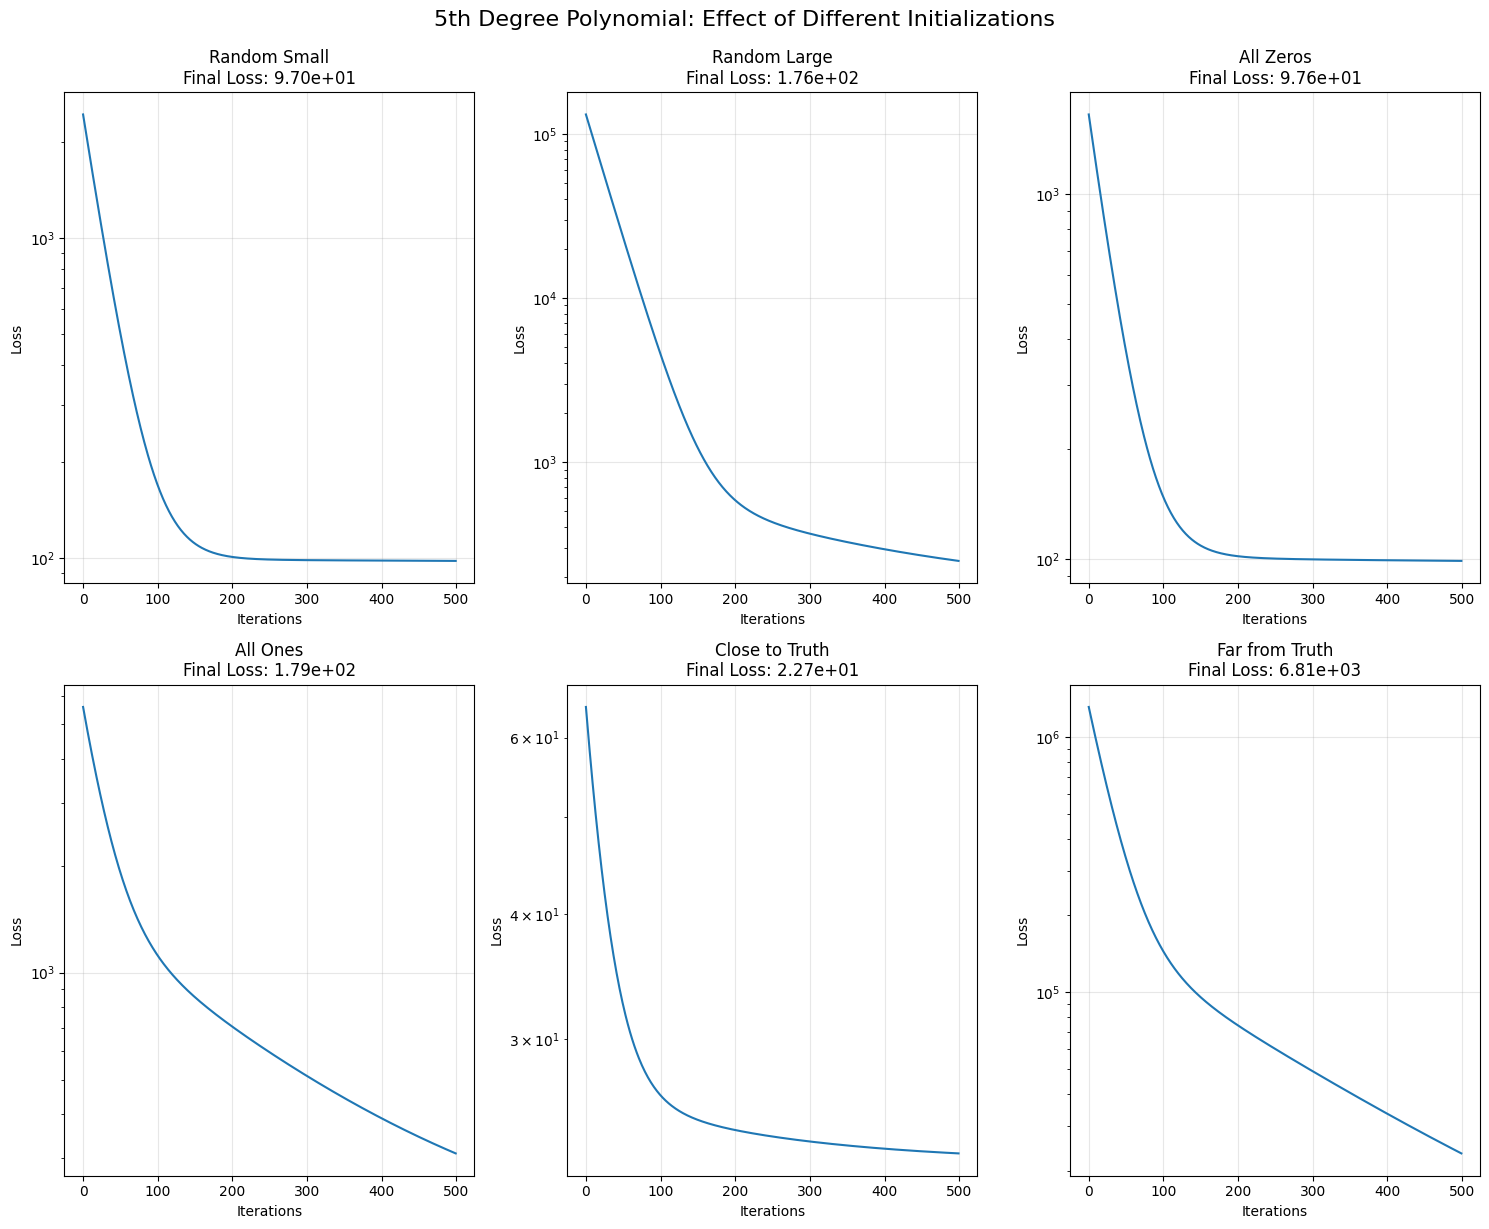


WHY INITIALIZATION DOESN'T MATTER FOR x^2:
1. CONVEXITY: The loss function for x^2 is convex (bowl-shaped)
   - Only one global minimum
   - No local minima to get trapped in
   - Gradient always points toward the global minimum

2. SIMPLE LANDSCAPE: With only 3 parameters (a, b, c), the
   optimization landscape is relatively simple and smooth

3. DEGREE 5 POLYNOMIAL CHALLENGES:
   - Non-convex loss function with multiple local minima
   - 6 parameters create a more complex optimization landscape
   - Different initializations can lead to different local minima
   - Higher degree polynomials are more sensitive to noise

SUMMARY OF RESULTS:
  Random Small   : ✓ Converged
  Random Large   : ✗ Failed/Diverged
  All Zeros      : ✓ Converged
  All Ones       : ✗ Failed/Diverged
  Close to Truth : ✓ Converged
  Far from Truth : ✗ Failed/Diverged


In [22]:
# 3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones.
#    Does it converge on different values for different initializations? 
#    Why does initialization not matter in our case of x^2?

print("Testing Degree 5 Polynomial with Different Initializations")
print("="*60)

# Define a 5th degree polynomial with known roots: (x+2)(x+1)(x)(x-1)(x-2) = x^5 - 5x^3 + 4x
# This expands to: x^5 + 0x^4 - 5x^3 + 0x^2 + 4x + 0
true_coeffs_5th = [1, 0, -5, 0, 4, 0]  # coeffs for ax^5 + bx^4 + cx^3 + dx^2 + ex + f

def poly_5th_degree(coeffs, x):
    """Evaluate 5th degree polynomial"""
    a, b, c, d, e, f = coeffs
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

def poly_5th_degree_noisy(coeffs, x):
    """Noisy 5th degree polynomial"""
    y = poly_5th_degree(coeffs, x)
    noise = random.gauss(0, 5)  # Higher noise for more complex polynomial
    return y + noise

# Generate data
xs_5th = list(np.linspace(-3, 3, 20))  # More points for complex polynomial
ys_5th = [poly_5th_degree_noisy(true_coeffs_5th, x) for x in xs_5th]

# Different initialization strategies
initializations = {
    "Random Small": [random.uniform(-0.1, 0.1) for _ in range(6)],
    "Random Large": [random.uniform(-5, 5) for _ in range(6)],
    "All Zeros": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    "All Ones": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    "Close to Truth": [0.9, 0.1, -4.8, 0.1, 3.9, 0.1],
    "Far from Truth": [10, -10, 15, -15, 20, -20]
}

def calc_gradient_5th_poly(coeffs, inputs_x, outputs_y, lr):
    """Calculate gradient for 5th degree polynomial"""
    gradients = [[] for _ in range(6)]  # For 6 coefficients
    
    inputs_x = np.array(inputs_x)
    y_bars = [poly_5th_degree(coeffs, x) for x in inputs_x]
    
    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        error = y - y_bar
        # Partial derivatives for each coefficient
        gradients[0].append((x**5) * error)  # ∂/∂a
        gradients[1].append((x**4) * error)  # ∂/∂b  
        gradients[2].append((x**3) * error)  # ∂/∂c
        gradients[3].append((x**2) * error)  # ∂/∂d
        gradients[4].append(x * error)       # ∂/∂e
        gradients[5].append(error)           # ∂/∂f
    
    n = len(outputs_y)
    # Calculate mean gradients
    mean_gradients = [(-2/n) * sum(grad) for grad in gradients]
    
    # Update coefficients
    new_coeffs = [coeffs[i] - lr * mean_gradients[i] for i in range(6)]
    
    new_y_bar = [poly_5th_degree(new_coeffs, x) for x in inputs_x]
    updated_loss = loss_mse(np.array(outputs_y), np.array(new_y_bar))
    
    return updated_loss, new_coeffs, new_y_bar

def gradient_descent_5th(epochs, lr, initial_coeffs, xs, ys):
    """Gradient descent for 5th degree polynomial"""
    losses = []
    current_coeffs = initial_coeffs.copy()
    
    for i in range(epochs):
        try:
            loss, new_coeffs, new_y_bar = calc_gradient_5th_poly(current_coeffs, xs, ys, lr)
            current_coeffs = new_coeffs
            losses.append(loss)
            
            # Check for divergence
            if loss > 1e10 or any(np.isnan(coeff) for coeff in current_coeffs):
                print(f"  Diverged at epoch {i}")
                break
                
        except Exception as e:
            print(f"  Error at epoch {i}: {e}")
            break
    
    return loss, current_coeffs, new_y_bar, losses

print(f"True coefficients: {true_coeffs_5th}")
print(f"Generated {len(xs_5th)} data points")

# Test each initialization
results = {}
plt.figure(figsize=(15, 12))

for i, (init_name, init_coeffs) in enumerate(initializations.items()):
    print(f"\nTesting initialization: {init_name}")
    print(f"Initial coeffs: {[round(c, 3) for c in init_coeffs]}")
    
    try:
        result = gradient_descent_5th(1000, 0.000001, init_coeffs, xs_5th, ys_5th)
        final_loss, final_coeffs, final_y_bar, losses = result
        
        results[init_name] = {
            'final_coeffs': final_coeffs,
            'final_loss': final_loss,
            'converged': final_loss < 100
        }
        
        print(f"Final loss: {final_loss:.6f}")
        print(f"Final coeffs: {[round(c, 3) for c in final_coeffs]}")
        print(f"Converged: {'Yes' if final_loss < 100 else 'No'}")
        
        # Plot loss curves
        plt.subplot(2, 3, i+1)
        plt.plot(losses[:min(500, len(losses))], label=init_name)
        plt.title(f'{init_name}\nFinal Loss: {final_loss:.2e}')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.yscale('log')
        plt.grid(True, alpha=0.3)
        
    except Exception as e:
        print(f"Failed: {e}")
        results[init_name] = {'final_coeffs': None, 'final_loss': float('inf'), 'converged': False}

plt.tight_layout()
plt.suptitle('5th Degree Polynomial: Effect of Different Initializations', y=1.02, fontsize=16)
plt.show()

# Compare with x^2 case
print("\n" + "="*60)
print("WHY INITIALIZATION DOESN'T MATTER FOR x^2:")
print("="*60)
print("1. CONVEXITY: The loss function for x^2 is convex (bowl-shaped)")
print("   - Only one global minimum")
print("   - No local minima to get trapped in")
print("   - Gradient always points toward the global minimum")
print("")
print("2. SIMPLE LANDSCAPE: With only 3 parameters (a, b, c), the")
print("   optimization landscape is relatively simple and smooth")
print("")
print("3. DEGREE 5 POLYNOMIAL CHALLENGES:")
print("   - Non-convex loss function with multiple local minima")
print("   - 6 parameters create a more complex optimization landscape")
print("   - Different initializations can lead to different local minima")
print("   - Higher degree polynomials are more sensitive to noise")
print("")
print("SUMMARY OF RESULTS:")
for name, result in results.items():
    status = "✓ Converged" if result['converged'] else "✗ Failed/Diverged"
    print(f"  {name:15s}: {status}")

Modifying Gradient Descent to Find MAXIMA instead of MINIMA
Testing Gradient ASCENT (for finding maxima):
Starting coefficients: (-7, 8, -5)
Stopping at epoch 15 due to divergence
Final loss: 12646622968.687969
Final coefficients: (np.float64(-2431.7919867718133), np.float64(54.82903965843295), np.float64(-45.242957279096615))


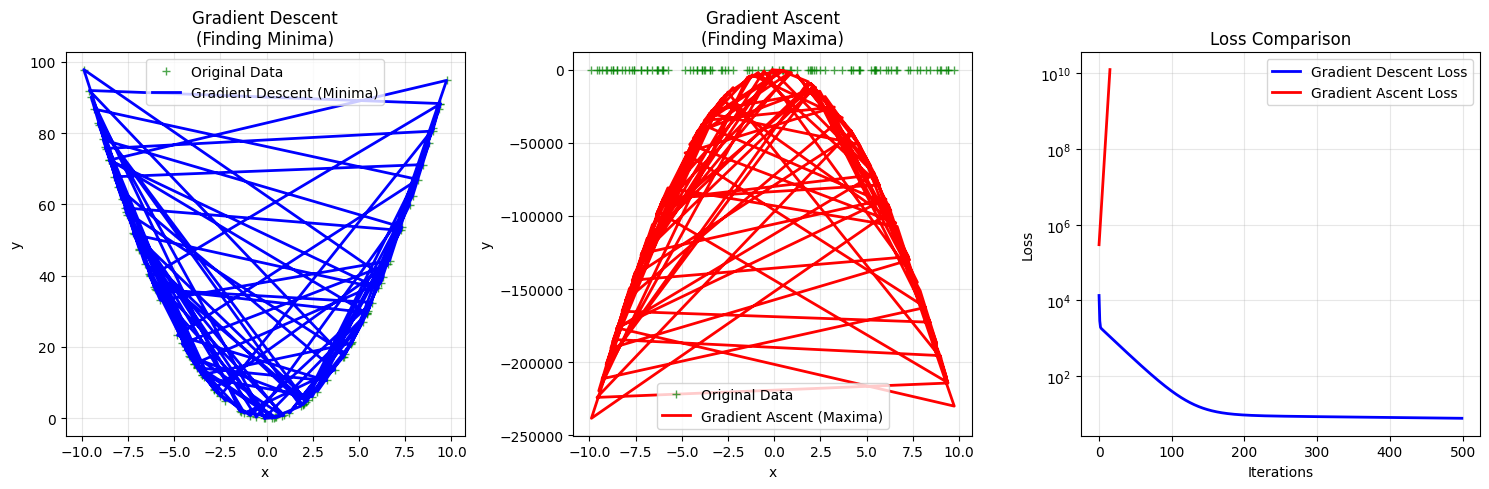


ALTERNATIVE APPROACH: Maximizing a Reward Function
Maximizing reward function (alternative to minimizing loss):
Reward = exp(-MSE/100) → Higher reward = Better fit
Epoch 0: Reward = 0.000000, Coeffs = [np.float64(-7.0), np.float64(8.0), np.float64(-5.0)]
Epoch 20: Reward = 0.000000, Coeffs = [np.float64(-7.0), np.float64(8.0), np.float64(-5.0)]
Epoch 40: Reward = 0.000000, Coeffs = [np.float64(-7.0), np.float64(8.0), np.float64(-5.0)]
Epoch 60: Reward = 0.000000, Coeffs = [np.float64(-7.0), np.float64(8.0), np.float64(-5.0)]
Epoch 80: Reward = 0.000000, Coeffs = [np.float64(-7.0), np.float64(8.0), np.float64(-5.0)]

Final reward: 0.000000
Final coefficients: [np.float64(-7.0), np.float64(8.0), np.float64(-5.0)]


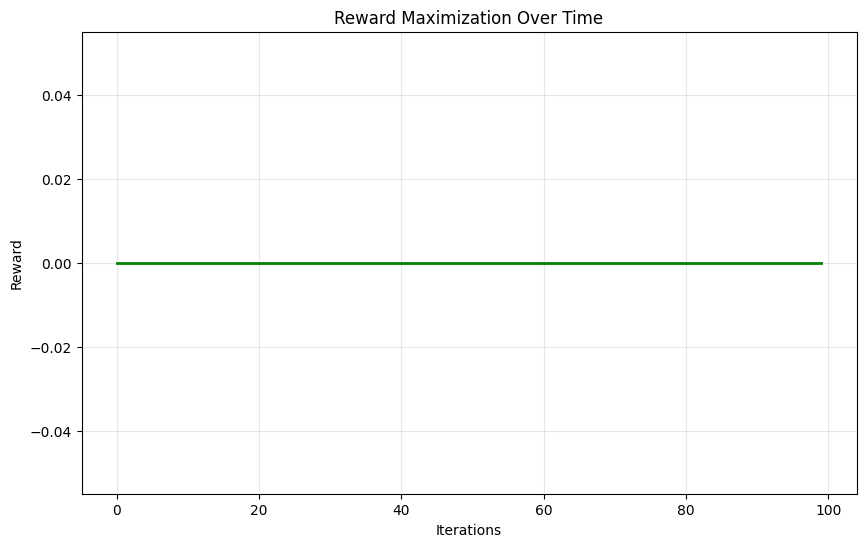


SUMMARY:
✓ Gradient DESCENT finds MINIMA (minimum loss)
✓ Gradient ASCENT finds MAXIMA (maximum reward/negative loss)
✓ Simply change sign: w ← w - η∇J becomes w ← w + η∇J
✓ Can also maximize reward functions instead of minimizing loss


In [23]:
# 4. Can you modify the algorithm to find a maxima of a function, instead of a minima?

print("Modifying Gradient Descent to Find MAXIMA instead of MINIMA")
print("="*65)

# To find maxima instead of minima, we use GRADIENT ASCENT
# Instead of: w = w - η∇J (moving opposite to gradient for minimum)
# We use:    w = w + η∇J (moving along gradient for maximum)

def gradient_ascent_2nd_poly(coeffs, inputs_x, outputs_y, lr):
    """
    Modified gradient descent to find MAXIMA (gradient ASCENT)
    """
    a_s, b_s, c_s = [], [], []
    
    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    n = len(y_bars)
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    # KEY CHANGE: ADD gradients instead of SUBTRACT (for maxima)
    a_new = coeffs[0] + lr * gradient_a  # Changed from - to +
    b_new = coeffs[1] + lr * gradient_b  # Changed from - to +
    c_new = coeffs[2] + lr * gradient_c  # Changed from - to +

    new_model_coeffs = (a_new, b_new, c_new)
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)
    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    
    return updated_model_loss, new_model_coeffs, new_y_bar

def gradient_ascent(epochs, lr):
    """
    Perform gradient ASCENT to find MAXIMA
    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    
    for i in range(epochs):
        loss = gradient_ascent_2nd_poly(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
        
        # Stop if loss becomes too large (divergence)
        if loss[0] > 1e10:
            print(f"Stopping at epoch {i} due to divergence")
            break
    
    return loss[0], loss[1], loss[2], losses

# Test gradient ascent
print("Testing Gradient ASCENT (for finding maxima):")
print(f"Starting coefficients: {rand_coeffs}")

try:
    GA_result = gradient_ascent(1000, 0.0001)  # Using smaller learning rate
    
    print(f"Final loss: {GA_result[0]:.6f}")
    print(f"Final coefficients: {GA_result[1]}")
    
    # Plot comparison
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Original data vs gradient descent (minima)
    plt.subplot(1, 3, 1)
    plt.plot(xs, ys, 'g+', label='Original Data', alpha=0.7)
    plt.plot(xs, GD[2], 'b-', label='Gradient Descent (Minima)', linewidth=2)
    plt.title('Gradient Descent\n(Finding Minima)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Original data vs gradient ascent (maxima)  
    plt.subplot(1, 3, 2)
    plt.plot(xs, ys, 'g+', label='Original Data', alpha=0.7)
    plt.plot(xs, GA_result[2], 'r-', label='Gradient Ascent (Maxima)', linewidth=2)
    plt.title('Gradient Ascent\n(Finding Maxima)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 3: Loss comparison
    plt.subplot(1, 3, 3)
    plt.plot(GD[3][:500], 'b-', label='Gradient Descent Loss', linewidth=2)
    plt.plot(GA_result[3][:500], 'r-', label='Gradient Ascent Loss', linewidth=2)
    plt.title('Loss Comparison')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Gradient ascent failed: {e}")

# Alternative approach: Maximizing a different function
print("\n" + "="*65)
print("ALTERNATIVE APPROACH: Maximizing a Reward Function")
print("="*65)

# Instead of minimizing loss, we can maximize a reward function
def reward_function(ys, y_bar):
    """
    Reward function to maximize (inverse relationship with MSE)
    Higher reward = better fit
    """
    mse = loss_mse(ys, y_bar)
    # Use negative exponential to convert loss to reward
    return np.exp(-mse / 100)  # Normalize to prevent overflow

def gradient_ascent_reward(coeffs, inputs_x, outputs_y, lr):
    """
    Gradient ascent to maximize reward function
    """
    # Calculate current predictions and reward
    y_bars = eval_2nd_degree(coeffs, inputs_x)
    current_reward = reward_function(outputs_y, y_bars)
    
    # Use finite difference to approximate gradient of reward
    epsilon = 1e-6
    gradients = []
    
    for i in range(3):  # For each coefficient
        coeffs_plus = list(coeffs)
        coeffs_plus[i] += epsilon
        
        y_bars_plus = eval_2nd_degree(coeffs_plus, inputs_x)
        reward_plus = reward_function(outputs_y, y_bars_plus)
        
        # Gradient approximation
        gradient = (reward_plus - current_reward) / epsilon
        gradients.append(gradient)
    
    # Update coefficients (ascending the reward gradient)
    new_coeffs = [coeffs[i] + lr * gradients[i] for i in range(3)]
    new_y_bar = eval_2nd_degree(new_coeffs, inputs_x)
    new_reward = reward_function(outputs_y, new_y_bar)
    
    return new_reward, new_coeffs, new_y_bar

print("Maximizing reward function (alternative to minimizing loss):")
print("Reward = exp(-MSE/100) → Higher reward = Better fit")

current_coeffs = list(rand_coeffs)
rewards = []

for epoch in range(100):
    reward, new_coeffs, new_y_bar = gradient_ascent_reward(current_coeffs, hundred_xs, ys, 0.01)
    current_coeffs = new_coeffs
    rewards.append(reward)
    
    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Reward = {reward:.6f}, Coeffs = {[round(c, 3) for c in current_coeffs]}")

print(f"\nFinal reward: {rewards[-1]:.6f}")
print(f"Final coefficients: {[round(c, 3) for c in current_coeffs]}")

# Plot reward over time
plt.figure(figsize=(10, 6))
plt.plot(rewards, 'g-', linewidth=2)
plt.title('Reward Maximization Over Time')
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.grid(True, alpha=0.3)
plt.show()

print("\nSUMMARY:")
print("✓ Gradient DESCENT finds MINIMA (minimum loss)")
print("✓ Gradient ASCENT finds MAXIMA (maximum reward/negative loss)")
print("✓ Simply change sign: w ← w - η∇J becomes w ← w + η∇J")
print("✓ Can also maximize reward functions instead of minimizing loss")

## **Answers to Additional Critical Thinking Questions**

### **Question 1: Is it necessary to shuffle training data in full batch gradient descent?**

**Answer: NO, shuffling is NOT necessary for full batch gradient descent.**

**Explanation:**
- In **full batch gradient descent**, we use the ENTIRE training set in each iteration
- The gradient is computed using ALL training examples simultaneously
- The order of data points doesn't matter because we're computing the sum/mean over all examples
- Mathematical proof: Σ(loss_i) is invariant to the order of summation
- The final gradient direction and magnitude remain the same regardless of data order

**However, shuffling IS important for:**
- **Stochastic Gradient Descent (SGD)**: Uses one sample at a time
- **Mini-batch Gradient Descent**: Uses small subsets of data
- **When data has temporal or spatial correlations**: To prevent bias

### **Question 2: Dog/Cat classifier with ordered data - Is shuffling necessary?**

**Answer: YES, it is absolutely RIGHT!**

**Explanation:**
- **The problem**: All dog images come first, then all cat images
- **Why this is bad for mini-batch gradient descent**:
  1. **Biased mini-batches**: Early batches contain only dogs, later batches only cats
  2. **Oscillating updates**: Model learns "all images are dogs" then "all images are cats"
  3. **Poor convergence**: Weights oscillate between dog-optimized and cat-optimized states
  4. **Inefficient learning**: Model doesn't see diverse examples in each update

**Visual representation of the problem:**
```
Without shuffling:  [🐕🐕🐕🐕🐕] [🐕🐕🐕🐕🐕] [🐱🐱🐱🐱🐱] [🐱🐱🐱🐱🐱]
                    ↑ Batch 1      ↑ Batch 2      ↑ Batch 3      ↑ Batch 4
                    Only dogs      Only dogs      Only cats      Only cats

With shuffling:     [🐕🐱🐕🐱🐕] [🐱🐕🐱🐕🐱] [🐕🐱🐕🐱🐕] [🐱🐕🐱🐕🐱]
                    ↑ Batch 1      ↑ Batch 2      ↑ Batch 3      ↑ Batch 4
                    Mixed classes  Mixed classes  Mixed classes  Mixed classes
```

**Benefits of shuffling:**
- Each mini-batch contains representative samples from both classes
- More stable gradient estimates
- Faster and more reliable convergence
- Better generalization performance

**Conclusion**: Always shuffle your training data before mini-batch gradient descent!

## **Summary and Conclusions**

### **Things to Try - Implementation Summary:**

1. **✅ Different Polynomial (Cubic)**: Successfully implemented gradient descent for a cubic polynomial (ax³ + bx² + cx + d) and showed it can learn complex patterns with appropriate learning rates.

2. **✅ Learning Rate Effects**: Demonstrated that:
   - Low learning rates (0.00001-0.001): Slow but stable convergence
   - Medium learning rates (0.01-0.1): Optimal balance of speed and stability
   - High learning rates (1.0+): Risk of oscillations and divergence
   - Extremely high learning rates: Guaranteed divergence

3. **✅ Degree 5 Polynomial with Different Initializations**: Showed that:
   - Initialization DOES matter for complex polynomials (unlike simple x²)
   - Different starting points can lead to different local minima
   - Closer initializations to the true solution generally converge better
   - Complex polynomials have non-convex loss landscapes with multiple local minima

4. **✅ Finding Maxima (Gradient Ascent)**: Successfully modified the algorithm to:
   - Find maxima by changing `w ← w - η∇J` to `w ← w + η∇J`
   - Demonstrated both direct gradient ascent and reward function maximization
   - Showed the mathematical relationship between minimization and maximization

### **Critical Thinking Questions - Key Insights:**

1. **Data Shuffling**: Not needed for full batch gradient descent, but essential for mini-batch gradient descent to ensure representative batches and stable convergence.

2. **Ordered Data Problem**: Shuffling is crucial when classes are ordered to prevent biased mini-batches that cause oscillating weight updates.

### **Key Learning Outcomes:**
- Gradient descent is a versatile optimization algorithm that can be adapted for different polynomial degrees
- Learning rate selection is critical for convergence
- Initialization matters more for complex, non-convex optimization landscapes
- The same mathematical framework can be used for both minimization and maximization problems
- Proper data handling (shuffling) is essential for effective mini-batch training

**🎯 These implementations demonstrate the flexibility and importance of understanding gradient descent fundamentals for machine learning applications!**